<a href="https://colab.research.google.com/github/pithecuse527/ML-Study/blob/main/KNeighborsClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### MNIST with KNN(KNeighborsClassifier)

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml(name='mnist_784', version=1, as_frame=False)

In [3]:
X, y = mnist['data'], mnist['target']

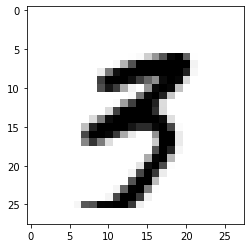

In [4]:
import matplotlib
import matplotlib.pyplot as plt

some_digit_3 = X[1007]
some_digit_3_img = some_digit_3.reshape(28, 28)
plt.imshow(some_digit_3_img, cmap=matplotlib.cm.binary, interpolation='nearest')

In [5]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [6]:
import numpy as np

shuffled_idx = np.random.permutation(60000)
X_train, y_train = X_train[shuffled_idx], y_train[shuffled_idx]

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5]}]
knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid=[{'n_neighbors': [3, 4, 5],
                          'weights': ['uniform', 'distance']}],
             verbose=3)

In [14]:
grid_search.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [15]:
grid_search.best_score_

0.9736

In [16]:
from sklearn.model_selection import cross_val_score

cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=3, scoring="accuracy")

array([0.96985, 0.97225, 0.9717 ])

In [17]:
knn_clf_best = grid_search.best_estimator_

In [18]:
knn_clf_best.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [19]:
y_knn_pred = knn_clf_best.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_knn_pred)

0.9714

### Shifted MNIST images training

In [21]:
from scipy.ndimage.interpolation import shift

def shift_image(image, dx, dy):
  image = image.reshape(28, 28)
  shifted_image = shift(image, [dy, dx], cval=0, mode='constant')
  return shifted_image.reshape([-1])

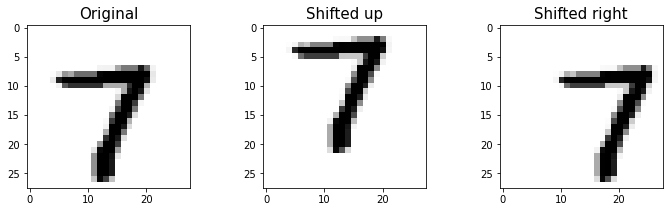

In [22]:
# test the img shift

some_image = X_train[2001]
shifted_up_some_image = shift_image(some_image, 0, -5)
shifted_right_some_image = shift_image(some_image, 5, 0)

plt.figure(figsize=(12,3))
plt.subplot(131)
plt.title("Original", fontsize=15)
plt.imshow(some_image.reshape(28, 28), interpolation="nearest", cmap=matplotlib.cm.binary)

plt.subplot(132)
plt.title("Shifted up", fontsize=15)
plt.imshow(shifted_up_some_image.reshape(28, 28), interpolation="nearest", cmap="Greys")

plt.subplot(133)
plt.title("Shifted right", fontsize=15)
plt.imshow(shifted_right_some_image.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.show()

In [23]:
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [24]:
shuffled_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffled_idx]
y_train_augmented = y_train_augmented[shuffled_idx]

In [25]:
knn_clf_best = grid_search.best_estimator_
knn_clf_best.fit(X_train_augmented, y_train_augmented)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [27]:
y_knn_aug_pred = knn_clf_best.predict(X_test)
accuracy_score(y_test, y_knn_aug_pred)

0.9763